<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/nyandwi/machine_learning_complete/blob/main/8_deep_computer_vision_with_tensorflow/2_cnn_for_real_world_data_and_image_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

*This notebook was created by [Jean de Dieu Nyandwi](https://twitter.com/jeande_d) for the love of machine learning community. For any feedback, errors or suggestion, he can be reached on email (johnjw7084 at gmail dot com), [Twitter](https://twitter.com/jeande_d), or [LinkedIn](https://linkedin.com/in/nyandwi).*

<a name='0'></a>

# CNN for Real World Dataset and Image Augmentation

### Contents 

* [1. Intro - Real World Datasets and Data Augmentation](#1)
* [2. Getting Started: Real World Datasets and Overfitting](#2)
   * [2.1 Loading and Preparing the Data](#2-1)
   * [2.2 Buiding, Compiling and Training a Model](#2-2)
   * [2.3 Visualizing the Model Results](#2-3)
   
* [3. Image Augmentation with ImageDataGenerator ](#3)
   * [3.1 Loading the Data Again](#3-1)
   * [3.2 Applying Data Augmentation](#3-2)
   * [3.3 Visualizing Augmented Images](#3-3)
   * [3.4 Retraining a Model on Augmented Data](#3-4)
   * [3.5 Visualizing the Model Resuts](#3-5)
   * [3.6 Further Improvements: Using Pretrained Models](#3-6)
   * [3.7 Saving, Loading, and Testing a Model on New Images](#3-7)

* [4. Image Augmentation with Keras Image Augmentation Layers ](#4)
   * [4.1 Getting the Data again](#4-1)
   * [4.2 Looking in the Data](#4-2)
   * [4.3 Preprocessing Data](#4-3)
   * [4.4 Augmenting the Images with Auggmentation Layers](#4-4)
   * [4.5 First Option: Building a Model with an Augmented Images](#4-5)
   * [4.6 Second Option: Augmenting the Images Inside a Model](#4-6)

* [5. Further Learning](#4)

<a name='1'></a>

## 1. Intro - Real World Datasets and Image Augmentation

Real world image datasets are not always prepared and most of the time, they are not enough in quantity. 

Training an effective computer vision system requires a huge amount of images. That is not always the case though. When [MIT Technology Review asked Andrew Ng. about the size of the data](https://www.technologyreview.com/2021/03/26/1021258/ai-pioneer-andrew-ng-machine-learning-business/) required to build an AI project, he said: 

"***Machine learning is so diverse that it’s become really hard to give one-size-fits-all answers. I’ve worked on problems where I had about 200 to 300 million images. I’ve also worked on problems where I had 10 images, and everything in between. When I look at manufacturing applications, I think something like tens or maybe a hundred images for a defect class is not unusual, but there’s very wide variance even within the factory***". 


We can not emphasize enough the advantages of having both good and enough data although such blend is not always possible. 

Given that sometime we may have a handful of images, how can we go about it? Are there ways to expand the small image dataset? And boost the performance of the machine learning model as a result?

With the advancement of machine learning techniques, it has become possible to add a boost to the performance metrics by just expanding the existing dataset. The technique of synthetizing new data(images) from existing data is called [data augmentation](https://jeande.medium.com/a-handy-notes-on-the-art-of-data-augmentation-643acd7300b7). 

image datasets can be augmented in various ways including: 

* Flipping the image, vertically or horizontally. 
* Cropping the image.
* Changing contrast and color of the image.
* Adding noise to the data.
* Rotating the image at a given degree.

Below image summarize all possibilities that can be done in image data augmentation. 

![Image Augmentation](https://cdn.hashnode.com/res/hashnode/image/upload/v1623166213173/JTRR1Btgm.png)

<a name='3'></a>

## 2. Getting Started: Real World Datasets and Overfitting

One of the most challenges in training machine learning models on real world datasets is `overfitting`. 

A model overfits when it memorized the training data due to insufficient training samples, or lack of diversity in training samples. By doing data augmentation, we are increasing the training samples, as well as introducing some diversity in the images. 

It's fair to say that data augmentation is the cure to overfitting. To test that, let's train a quick cat and dog classifier. After that, we will augment the images to ovoid overfitting. 

### Without Data Augmentation: Training Cat and Dog Classifier 

We are going to see the need of data augmentation by training a cat and dog classifier. 

Along the way, we will let the results guide the latter. 

<a name='2-1'></a>

### 2.1 Loading and Preparing Cat and Dog Data

#### Imports

In [ ]:
import tensorflow as tf
from tensorflow import keras
import os 
import zipfile
import matplotlib.pyplot as plt
import numpy as np

#### Getting the data

The version of the data that we are going to use here is a filtered version. Orginally, it contains [over 20.000 images](https://www.microsoft.com/en-us/download/details.aspx?id=54765). 

In [ ]:
# Load the data into the workspace

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-09-18 06:21:48--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.147.128, 142.250.125.128, 142.250.136.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.147.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   178MB/s    in 0.4s    

2021-09-18 06:21:48 (178 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
# Extract the zip file

zip_dir = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(zip_dir, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Now that the images are extracted (you can verify that by looking in Colab directory), let's get the training and validation directories from the main directory.

In [ ]:
main_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(main_dir, 'train')
val_dir = os.path.join(main_dir, 'validation')

We will continue with getting the cats and dogs in the above defined directories. 

In [ ]:
train_cat_dir = os.path.join(train_dir, 'cats')
train_dog_dir = os.path.join(train_dir, 'dogs')

val_cat_dir = os.path.join(val_dir, 'cats')
val_dog_dir = os.path.join(val_dir, 'dogs')

Now, our directories are quite arranged. Let's see peep into the directories. 

In [ ]:
os.listdir(main_dir)

['vectorize.py', 'train', 'validation']

In [ ]:
os.listdir(train_cat_dir)[:10]

['cat.504.jpg',
 'cat.148.jpg',
 'cat.560.jpg',
 'cat.506.jpg',
 'cat.182.jpg',
 'cat.300.jpg',
 'cat.178.jpg',
 'cat.791.jpg',
 'cat.260.jpg',
 'cat.328.jpg']

Let's walk through the directories and see the number of images in each directory.

In [ ]:
for dir, dirname, filename in os.walk(main_dir):
  print(f"Found {len(dirname)} directories and {len(filename)} images in {dir}")

Found 2 directories and 1 images in /tmp/cats_and_dogs_filtered
Found 2 directories and 0 images in /tmp/cats_and_dogs_filtered/train
Found 0 directories and 1000 images in /tmp/cats_and_dogs_filtered/train/dogs
Found 0 directories and 1000 images in /tmp/cats_and_dogs_filtered/train/cats
Found 2 directories and 0 images in /tmp/cats_and_dogs_filtered/validation
Found 0 directories and 500 images in /tmp/cats_and_dogs_filtered/validation/dogs
Found 0 directories and 500 images in /tmp/cats_and_dogs_filtered/validation/cats


There are 3000 images, 2000 in training set, 1000 in validation set. Cats and dogs images are evenly splitted. 

Let's now generate a dataset to train the model.



#### Preparing the Dataset

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Rescale the image to values between 0 and 1

train_gen = ImageDataGenerator(rescale=1/255.0)
val_gen = ImageDataGenerator(rescale=1/255.0)

batch_size = 20
image_size = (180,180)

train_data = train_gen.flow_from_directory(train_dir, 
                                           batch_size=batch_size,
                                           class_mode='binary',
                                           target_size=image_size)

val_data = val_gen.flow_from_directory(val_dir, 
                                           batch_size=batch_size,
                                           class_mode='binary',
                                           target_size=image_size)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Before building a model, let's visualize the images. It's always a best practice.

In [ ]:
data_for_viz = tf.keras.preprocessing.image_dataset_from_directory(
    
          train_dir,
          image_size=(180,180))

Found 2000 files belonging to 2 classes.


In [ ]:
def image_viz(dataset):
  
  plt.figure(figsize=(12, 8))
  
  index = 0
  for image, label in dataset.take(12):
    
    index +=1
    ax = plt.subplot(4, 4, index)
    plt.imshow(image[index].numpy().astype("uint8"))
    plt.title(int(label[index]))
    plt.axis("off")

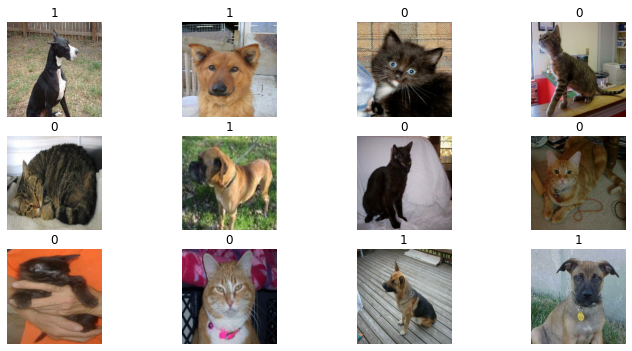

In [ ]:
image_viz(data_for_viz)

<a name='2-2'></a>

### 2.2 Building, Compiling and Training a Model

In [ ]:
def classifier():

  model = tf.keras.models.Sequential([

    # First convolution and pooling layer                                  
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(180, 180, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Second convolution and pooling layer

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Third convolution and pooling layer

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flattening layer for converting the feature maps into 1D column vector
    
    tf.keras.layers.Flatten(),

    # Fully connected layers

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')

  ])


  # Compiling the model: Specifying optimizer, loss and metric to track during training

  model.compile(
      
      optimizer=tf.keras.optimizers.RMSprop(),
      loss='binary_crossentropy',
      metrics=['accuracy']
  )

  return model


In [ ]:
# Training a model

model = classifier()

train_steps = 2000 / batch_size
val_steps = 1000 / batch_size

history = model.fit(train_data, 
          validation_data=val_data,
          epochs=50,
          steps_per_epoch=train_steps,
          validation_steps=val_steps)

Epoch 1/50
100/100 [==============================] - 45s 121ms/step - loss: 0.8243 - accuracy: 0.5435 - val_loss: 0.7136 - val_accuracy: 0.5000
Epoch 2/50
100/100 [==============================] - 12s 118ms/step - loss: 0.6378 - accuracy: 0.6455 - val_loss: 0.5870 - val_accuracy: 0.6690
Epoch 3/50
100/100 [==============================] - 12s 118ms/step - loss: 0.5446 - accuracy: 0.7245 - val_loss: 0.5848 - val_accuracy: 0.6990
Epoch 4/50
100/100 [==============================] - 12s 117ms/step - loss: 0.4387 - accuracy: 0.7955 - val_loss: 0.5780 - val_accuracy: 0.7310
Epoch 5/50
100/100 [==============================] - 12s 117ms/step - loss: 0.3505 - accuracy: 0.8525 - val_loss: 0.5507 - val_accuracy: 0.7550
Epoch 6/50
100/100 [==============================] - 12s 119ms/step - loss: 0.2380 - accuracy: 0.8940 - val_loss: 0.7112 - val_accuracy: 0.7190
Epoch 7/50
100/100 [==============================] - 12s 118ms/step - loss: 0.1427 - accuracy: 0.9425 - val_loss: 0.8400 - val_ac

<a name='2-3'></a>

### 2.3 Visualizing the Model Results

In [17]:
# function to plot accuracy and loss

def plot_acc_loss(acc, val_acc, loss, val_loss, epochs):

  plt.figure(figsize=(10,5))
  plt.plot(epochs, acc, 'r', label='Training Accuracy')
  plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc=0)

  # Create a new figure with plt.figure()
  plt.figure()

  plt.figure(figsize=(10,5))
  plt.plot(epochs, loss, 'b', label='Training Loss')
  plt.plot(epochs, val_loss, 'y', label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(loc=0)
  plt.show()

In [ ]:
model_history = history.history

acc = model_history['accuracy']
val_acc = model_history['val_accuracy']
loss = model_history['loss']
val_loss = model_history['val_loss']

epochs = history.epoch

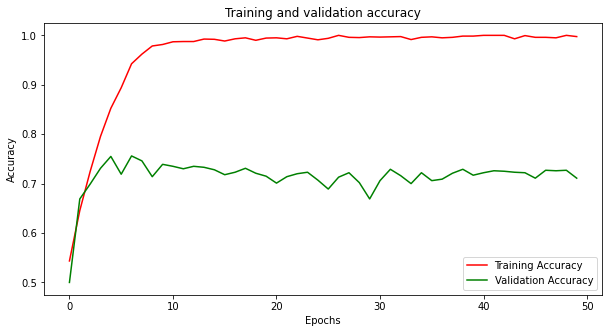

<Figure size 432x288 with 0 Axes>

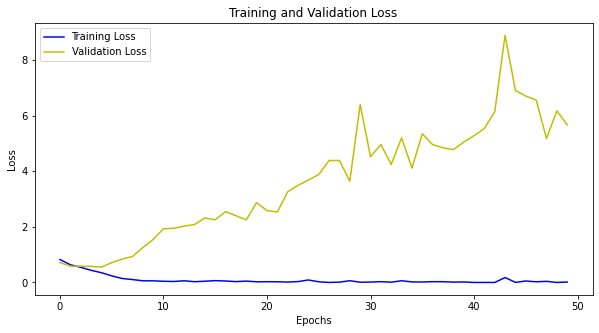

In [ ]:
plot_acc_loss(acc, val_acc, loss, val_loss, epochs)

Clearly, the our classifier overfitted. If you can look at the plots above, there is so much gap between the training and validation accuracy/loss. 

The classifier is overly confident at recognizing training images, but not so good when evaluated on the validation images. 

This goes to show that data augmentation is very useful technique. By just expanding the images, and introducing different image scenes, overfitting can potentially be handled. That is what we are going to do iin the next section.

<a name='3'></a>

## 3. Image Augmentation with ImageDataGenerator


`ImageDataGenerator` is a powerful Keras image processing functionality used to augment images. It is a part of [image data processing functions](https://keras.io/api/preprocessing/image/). 

The single most advantage of ImageDataGenerator is that it allows you to augment images in realtime, as you load them from a directory for example. 

The orginal directory of the data is not affected at all. The image will be loaded & augmented at the same time, while not affecting the orginal directory. 

<a name='3-1'></a>

### 3.1 Loading the Data Again

In [ ]:
# Download the data into the workspace

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip


# Extract the zip file

zip_dir = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(zip_dir, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# Get training and val directories

main_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(main_dir, 'train')
val_dir = os.path.join(main_dir, 'validation')

train_cat_dir = os.path.join(train_dir, 'cats')
train_dog_dir = os.path.join(train_dir, 'dogs')

val_cat_dir = os.path.join(val_dir, 'cats')
val_dog_dir = os.path.join(val_dir, 'dogs')

--2021-09-18 06:32:33--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.70.128, 74.125.201.128, 74.125.202.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.70.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   169MB/s    in 0.4s    

2021-09-18 06:32:34 (169 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



<a name='3-2'></a>

### 3.2 Apply Data Augmentation

We are going to use `ImageDataGenerator` to generate augmented images. 


Below are some of the options available in [ImageDataGenerator](https://keras.io/api/preprocessing/image/) and their explainations. 

```
train_imagenerator = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
```

* **rotation_range** is a value in degrees (0–180) to randomly rotate images.

* **width_shift and height_shift** are ranges of fraction of total width or height within which to translate pictures, either vertically or horizontally.

* **shear_range** is for applying shearing randomly.

* **zoom_range** is for zooming pictures randomly. 

* **horizontal_flip** is for flipping half of the images horizontally. There is also `vertical_flip` option. 

* **fill_mode** is for completing newly created pixels, which can appear after a rotation or a width/height shift.


See the [documentation](https://keras.io/api/preprocessing/image/), it is an interesting read, and there are more preprocessing functions that you might need in your future projects. 

Let's see this in practice! We will start by creating `train_imagenerator` which is an image generator for training set. 



In [ ]:
# Creating training image data generator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_imagenerator = ImageDataGenerator(
    
    rescale=1/255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    
)

We will also create `val_imagenerator`, but different to training generator, there are no augmentation. It's only rescaling the images pixels to values between 0 and 1. Images pixels are normally between 0 and 255. Rescaling the values improve the performance of the neural network and reduce training time as well. 

In [ ]:
# Validation image generator

val_imagenerator = ImageDataGenerator(rescale=1/255.)

After creating train and validation generators, let's use `image_dataset_from_directory function` to generate a TensorFlow dataset from images files located in our two directories. 

Below is how training and validation directories are structured:

```
cats_dogs_filtered/
..train/
....cats/
......cat.0.jpg
......cat.1.jpg
......cat.2.jpg
....dogs/
......dog.0.jpg
......dog.1.jpg
......dog.2.jpg
..validation/
....cats/
......cat.0.jpg
......cat.1.jpg
....dogs/
......dog.0.jpg
......dog.1.jpg
```

In [ ]:
# Load training images in batches of 20 while applying aumgmentation

batch_size = 20
target_size = (180,180)

train_generator = train_imagenerator.flow_from_directory(
        train_dir, #parent directory must be specified
        target_size = target_size, # All images will be resized to (180,180)
        batch_size=batch_size,
        class_mode='binary' # since we need binary labels(0,1) and we will use binary_crossentropy

) 

Found 2000 images belonging to 2 classes.


In [ ]:
val_generator = val_imagenerator.flow_from_directory(
        val_dir, #parent directory must be specified
        target_size = target_size, # All images will be resized to (180,180)
        batch_size=batch_size,
        class_mode='binary' # since we need binary labels(0,1) and we will use binary_crossentropy

) 

Found 1000 images belonging to 2 classes.


Another great advantage of `ImageDataGenerator` is that it generates the labels of the images based off their folders. During the model training, we won't need to specify the labels.

We are ready to train our machine learning model now, but before we could try to visualize the augmented images. 

<a name='3-3'></a>

### 3.3 Visualizing Augmented Images

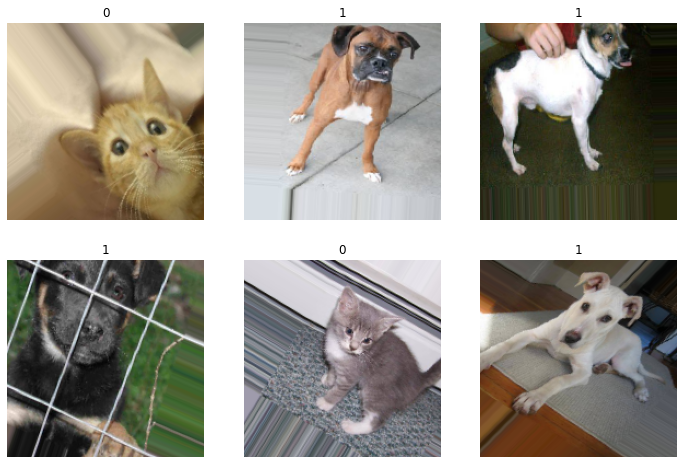

In [ ]:
# Get images in batch of 20
augmented_image, label = train_generator.next()

plt.figure(figsize=(12,8))
for i in range(6):
        ax = plt.subplot(2, 3, i + 1)
        plt.imshow(augmented_image[i])
        plt.title(int(label[i]))
        plt.axis("off")

It may be hard to spot since we are not comparing them with non augmented images, but if you can observe well, some images are zoomed in, rotated, and flipped horizantally. 

Below images are not augmented. You can see that no zoom were applied for example. 

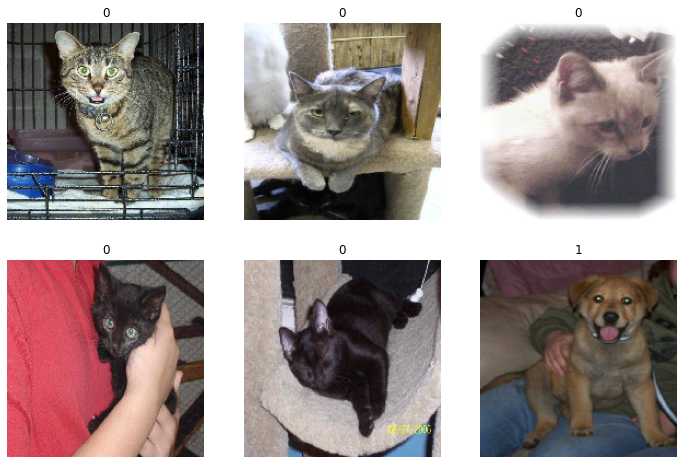

In [ ]:
non_augmented_image, label = train_data.next()

plt.figure(figsize=(12,8))
for i in range(6):
        ax = plt.subplot(2, 3, i + 1)
        plt.imshow(non_augmented_image[i])
        plt.title(int(label[i]))
        plt.axis("off")

Now that we have visualized the augmented images, let's retrain the model on augmented images. 

<a name='3-4'></a>

### 3.4 Retraining a Model on Augmented Images

You noticed that during training, we didn't have to provide the labels. `ImageDataGenerator` took care of it. As the images are loaded from their directories(cats, dogs), they are augmented and labelled at the same time. 

Another thing we can shed light on is the batch size. We have loaded our images in batch size of 20. Usually, the default batch size is 32. The value of the batch size only affect training time. The larger the size, the faster the training, and the smaller the size, the slower the training. 

The only issue with the large batch size is that it would requires many steps per epoch in order to give optimal model performance. I have merely used 20 based off the number of images we have in both sets, to facilitate the computation and steps per epochs. But a rule of thumb is to always start with 32. There is this great paper that talks about that: [Practical recommendations for gradient-based training of deep architectures - Yoshua Bengio](https://arxiv.org/pdf/1206.5533.pdf). 


To be able to see what the difference data augmentation will make, we will use the same model as before. Let's call it. 



In [ ]:
model_2 = classifier()

batch_size = 20

train_steps = 2000/batch_size
val_steps = 1000/batch_size

history_2 = model_2.fit(
      train_generator,
      steps_per_epoch=train_steps,  
      epochs=100,
      validation_data=val_generator,
      validation_steps=val_steps)

Epoch 1/100
100/100 [==============================] - 27s 262ms/step - loss: 0.9125 - accuracy: 0.5150 - val_loss: 0.6847 - val_accuracy: 0.5680
Epoch 2/100
100/100 [==============================] - 26s 260ms/step - loss: 0.7163 - accuracy: 0.5620 - val_loss: 0.7020 - val_accuracy: 0.5400
Epoch 3/100
100/100 [==============================] - 26s 260ms/step - loss: 0.6724 - accuracy: 0.6190 - val_loss: 0.6039 - val_accuracy: 0.6670
Epoch 4/100
100/100 [==============================] - 26s 261ms/step - loss: 0.6502 - accuracy: 0.6325 - val_loss: 0.6332 - val_accuracy: 0.6580
Epoch 5/100
100/100 [==============================] - 26s 261ms/step - loss: 0.6322 - accuracy: 0.6530 - val_loss: 0.5951 - val_accuracy: 0.6880
Epoch 6/100
100/100 [==============================] - 26s 261ms/step - loss: 0.6466 - accuracy: 0.6570 - val_loss: 0.5699 - val_accuracy: 0.6920
Epoch 7/100
100/100 [==============================] - 26s 259ms/step - loss: 0.6135 - accuracy: 0.6610 - val_loss: 0.5892 -

<a name='3-5'></a>

### 3.5 Visualizing The Model Results

In [ ]:
model_history_2 = history_2.history

acc = model_history_2['accuracy']
val_acc = model_history_2['val_accuracy']
loss = model_history_2['loss']
val_loss = model_history_2['val_loss']

epochs = history_2.epoch

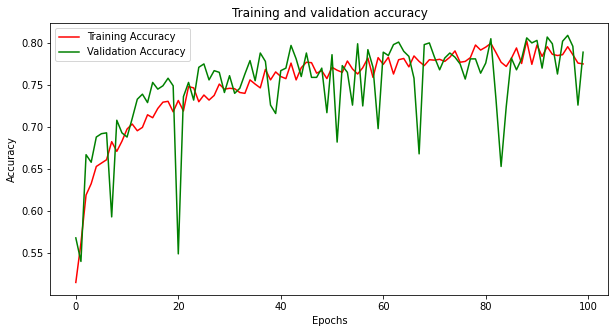

<Figure size 432x288 with 0 Axes>

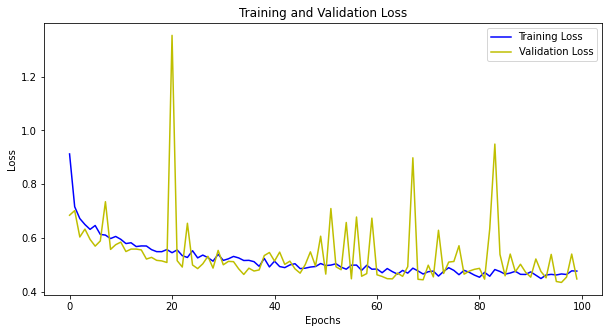

In [ ]:
plot_acc_loss(acc, val_acc, loss, val_loss, epochs)

This is not excellent, but it's alot better than the results we had without data augmentation. you remember that our model was overfitting, but now although it's not smooth, there is a big improvement. 

How to improve the results? One might try to tweak layers and filters. Machine Learning is very experimental. It's rare that the first model will work well. The result is a function of time and experimentation. 

So, in this case, we can try pretrained models. Pretrained models are open source models that are built by other engineers(often researchers) and we can use them instead of building a network from scratch. 

The technique of reusing a pretrained model into a given(similar) task is called [`transfer learning`](https://jeande.medium.com/transfer-learning-explained-a80d38ee1564). Although this will be covered in the next notebook, let's give it a shot right away.



<a name='3-6'></a>

### 3.6 Further Improvements: Using Pretrained Models

Pretrained models works so well for many problems, without the need of building models from scratch.

Imagine how far you get by standing on the shoulder of the giant! By using powerful models trained on big datasets, the results are pretty impressive. 

Let's practice that. For more about pretrained models, check the next notebook.

You can find available pretrained models in Keras on Keras [Applications](https://keras.io/api/applications/).

In [ ]:
pretrained_base_model = keras.applications.InceptionResNetV2(
    weights='imagenet',
    include_top=False, # Drop imagenet classifier on the top
    input_shape=(180,180,3)

)

219070464/219055592 [==============================] - 2s 0us/step


We then freeze the pretrained base model to avoid retraining the bottom layers.

In [ ]:
for layer in pretrained_base_model.layers:
  layer.trainable = False

Let's see the summary of the base model.

In [ ]:
pretrained_base_model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 180, 180, 3) 0                                            
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 89, 89, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 89, 89, 32)   96          conv2d_9[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 89, 89, 32)   0           batch_normalization[0][0]        
________________________________________________________________________________

Let's create a new model on top of the pretrained network.

In [ ]:
# Define the input shape
inputs = tf.keras.Input(shape=(180, 180, 3))

# stack the inputs to pretrained model and set training to false
x = pretrained_base_model(inputs, training=False)

# Add a pooling layer
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Add drop out layer

x = tf.keras.layers.Dropout(0.4)(x)

# Last output dense layer with 1 unit and sigmoid
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# Build a model
model_3 = tf.keras.Model(inputs, output)

Now let's compile the model and train on our augmented data.

In [ ]:
model_3.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics='accuracy'

)

In [ ]:
history_3 = model_3.fit(
      train_generator,
      steps_per_epoch=train_steps,  
      epochs=25,
      validation_data=val_generator,
      validation_steps=val_steps)

Epoch 1/25
100/100 [==============================] - 55s 412ms/step - loss: 0.2161 - accuracy: 0.9185 - val_loss: 0.0763 - val_accuracy: 0.9730
Epoch 2/25
100/100 [==============================] - 37s 372ms/step - loss: 0.1294 - accuracy: 0.9485 - val_loss: 0.0546 - val_accuracy: 0.9840
Epoch 3/25
100/100 [==============================] - 37s 369ms/step - loss: 0.1255 - accuracy: 0.9535 - val_loss: 0.0502 - val_accuracy: 0.9810
Epoch 4/25
100/100 [==============================] - 37s 372ms/step - loss: 0.1168 - accuracy: 0.9590 - val_loss: 0.0553 - val_accuracy: 0.9810
Epoch 5/25
100/100 [==============================] - 38s 376ms/step - loss: 0.1173 - accuracy: 0.9615 - val_loss: 0.0504 - val_accuracy: 0.9850
Epoch 6/25
100/100 [==============================] - 37s 373ms/step - loss: 0.1046 - accuracy: 0.9610 - val_loss: 0.0433 - val_accuracy: 0.9840
Epoch 7/25
100/100 [==============================] - 37s 374ms/step - loss: 0.1292 - accuracy: 0.9545 - val_loss: 0.0440 - val_ac

This is soo impressive, over 97% accuracy on training. You can see we didn't have to even train for 25 epochs, 10 would give great results. Let's plot the results and also later change the epochs to 10. 

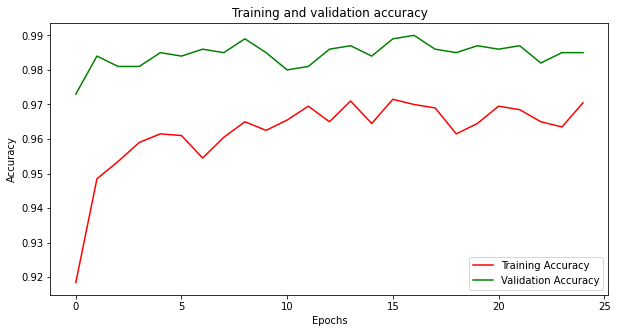

<Figure size 432x288 with 0 Axes>

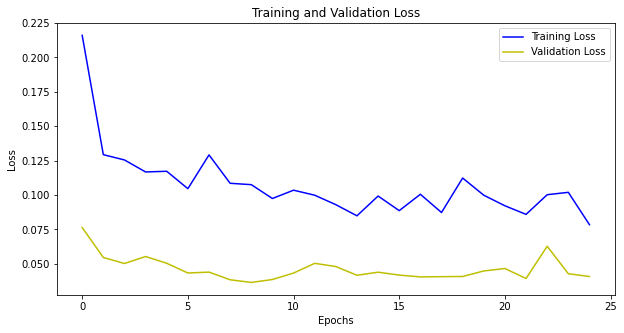

In [ ]:
model_history_3 = history_3.history

acc = model_history_3['accuracy']
val_acc = model_history_3['val_accuracy']
loss = model_history_3['loss']
val_loss = model_history_3['val_loss']

epochs = history_3.epoch

plot_acc_loss(acc, val_acc, loss, val_loss, epochs)

We have said that using a pretrained model is like standing on the shoulder of the giant. And that's pretty clear on the above graph, the accuracy started at ~90%. 

N.B. Calling model.fit(...) continue where the training left. To avoid adding up on previous training, you have to redefine & compile the model. 

In [ ]:
# Define the input shape
inputs = tf.keras.Input(shape=(180, 180, 3))

# stack the inputs to pretrained model and set training to false
x = pretrained_base_model(inputs, training=False)

# Add a pooling layer
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Add drop out layer

x = tf.keras.layers.Dropout(0.4)(x)

# Last output dense layer with 1 unit and sigmoid
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# Build a model
model_4 = tf.keras.Model(inputs, output)


In [ ]:
model_4.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics='accuracy'

)

In [ ]:
# Train for 10 epochs

history_4 = model_4.fit(
      train_generator,
      steps_per_epoch=train_steps,  
      epochs=10,
      validation_data=val_generator,
      validation_steps=val_steps)

Epoch 1/10
100/100 [==============================] - 53s 409ms/step - loss: 0.2150 - accuracy: 0.9175 - val_loss: 0.0557 - val_accuracy: 0.9830
Epoch 2/10
100/100 [==============================] - 37s 369ms/step - loss: 0.1386 - accuracy: 0.9460 - val_loss: 0.0491 - val_accuracy: 0.9830
Epoch 3/10
100/100 [==============================] - 37s 369ms/step - loss: 0.1041 - accuracy: 0.9595 - val_loss: 0.0511 - val_accuracy: 0.9830
Epoch 4/10
100/100 [==============================] - 37s 368ms/step - loss: 0.1119 - accuracy: 0.9610 - val_loss: 0.0522 - val_accuracy: 0.9820
Epoch 5/10
100/100 [==============================] - 37s 368ms/step - loss: 0.1112 - accuracy: 0.9615 - val_loss: 0.0539 - val_accuracy: 0.9810
Epoch 6/10
100/100 [==============================] - 37s 371ms/step - loss: 0.1100 - accuracy: 0.9645 - val_loss: 0.0483 - val_accuracy: 0.9820
Epoch 7/10
100/100 [==============================] - 37s 372ms/step - loss: 0.0999 - accuracy: 0.9615 - val_loss: 0.0463 - val_ac

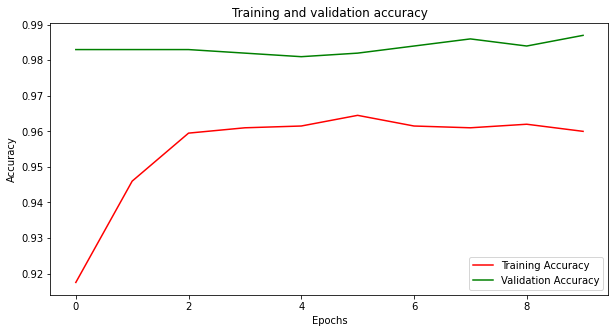

<Figure size 432x288 with 0 Axes>

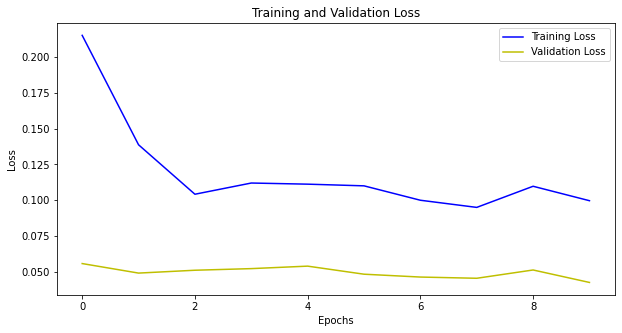

In [ ]:
model_history_4 = history_4.history

acc = model_history_4['accuracy']
val_acc = model_history_4['val_accuracy']
loss = model_history_4['loss']
val_loss = model_history_4['val_loss']

epochs = history_4.epoch

plot_acc_loss(acc, val_acc, loss, val_loss, epochs)

The reason why validation accuracy is better than training accuracy, or why validation loss is less than training loss, it's because the pretrained model has Batch Normalization and dropout layers. These regularization layers affects the accuracy during training, but they are turned off during validation. 

Also, during the training, accuracy and loss are averaged per epoch, while during validation phase, accuracy and loss are computed on a model that has already trained longer. 

You can notice this if you keep the eye on progress bar during the training. The training metrics change per step/epoch, and at the end of the epoch, the average loss/accuracy are reported. On the other hand, the validation metrics are computed after training on each epoch. 

<a name='3-7'></a>

### 3.7 Saving, Loading, and Testing a Model on New Images

In [ ]:
# Saving a model

model_4.save('final_model.h5')

# or 

#tf.keras.models.save_model(model_4, 'final_model.h5')

In [ ]:
# load a saved model

loaded_model = tf.keras.models.load_model('/content/final_model.h5')

In [ ]:
# function to download some images from the internet

def get_image(image_name,url):

  image = tf.keras.utils.get_file(image_name,url)

  return image

In [ ]:
# Urls of cats and dogs images

cat_1 = 'https://upload.wikimedia.org/wikipedia/commons/b/b6/Felis_catus-cat_on_snow.jpg'
cat_2 = 'https://upload.wikimedia.org/wikipedia/commons/6/69/June_odd-eyed-cat_cropped.jpg'

dog_1 = 'https://upload.wikimedia.org/wikipedia/commons/b/b5/2008-08-28_White_German_Shepherd_ready.jpg'
dog_2 = 'https://upload.wikimedia.org/wikipedia/commons/d/df/Dogs_were_not_around_in_the_early_Cenozoic.png'

In [ ]:
cat_im1 = get_image('cat_1',cat_1)
cat_im2 = get_image('cat_2',cat_2)

dog_im1 = get_image('dog_1',dog_1)
dog_im2 = get_image('dog_2',dog_2)

1974272/1959233 [==============================] - 0s 0us/step


In [ ]:
def predict(model, image):
  ''' Take model & image, preprocess image, make predictions, and return results'''

  image = tf.keras.preprocessing.image.load_img(image, target_size=(180,180))
  image = tf.keras.preprocessing.image.img_to_array(image)
  image = image/255.0
  image = tf.expand_dims(image, 0)

  predicted_class = model.predict(image)[0]
  rounded_predicted_class = tf.round(predicted_class)

  print(f"DISPLAYING THE PREDICTION RESULTS:\n \
    ---------- \n \
    Predicted class probability: {predicted_class}\n \
    Predicted class: {rounded_predicted_class}\n \
    Predicted class name: {'Dog' if rounded_predicted_class == 1 else 'Cat'}")

DISPLAYING THE PREDICTION RESULTS:
     ---------- 
     Predicted class probability: [0.99823844]
     Predicted class: [1.]
     Predicted class name: Dog


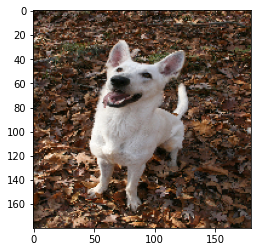

In [ ]:
predict(loaded_model, dog_im1)
plt.imshow(tf.keras.preprocessing.image.load_img(dog_im1, target_size=(180,180)));

DISPLAYING THE PREDICTION RESULTS:
     ---------- 
     Predicted class probability: [0.00061188]
     Predicted class: [0.]
     Predicted class name: Cat


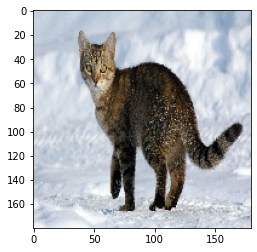

In [ ]:
predict(loaded_model, cat_im1)
plt.imshow(tf.keras.preprocessing.image.load_img(cat_im1, target_size=(180,180)));

DISPLAYING THE PREDICTION RESULTS:
     ---------- 
     Predicted class probability: [0.9991021]
     Predicted class: [1.]
     Predicted class name: Dog


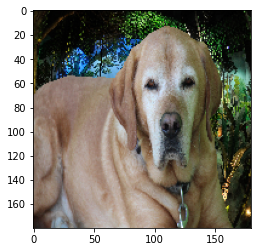

In [ ]:
predict(loaded_model, dog_im2)
plt.imshow(tf.keras.preprocessing.image.load_img(dog_im2, target_size=(180,180)));

DISPLAYING THE PREDICTION RESULTS:
     ---------- 
     Predicted class probability: [2.567915e-06]
     Predicted class: [0.]
     Predicted class name: Cat


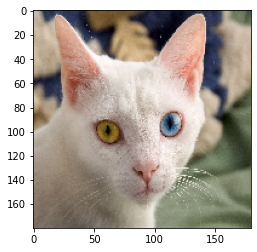

In [ ]:
predict(loaded_model, cat_im2)
plt.imshow(tf.keras.preprocessing.image.load_img(cat_im2, target_size=(180,180)));

<a name='4'></a>

## 4. Image Augmentation with Keras Image Augmentation Layers

`ImageDataGenerator` makes it easy to augment images while while loading them from the directory at the same time. 

But there is a time you may want the augmentation to takes place inside the model. In that case, you can use [Keras Image Augmentation layers](https://keras.io/api/layers/preprocessing_layers/image_augmentation/). These layers can be part of the model, and what that means is that the input image to a model will be augmented first before undergoing further preprocessing. 

But why would you want the images to be augmented inside the model? The single most advantage of it is that when you save a model, these layers are saved too. If you deploy a model to the mobile device for example, the images will be preprocessed automatically, and you won't have to write custom preprocessing codes. Also, as they are together with other model layers, you will benefit from GPU acceleration.

These types of layers can also be used to preprocess and augment images directly, or outside the model. 

A something worth noting is that just like [dropout](https://keras.io/api/layers/regularization_layers/dropout/) and [batch normalization](https://keras.io/api/layers/normalization_layers/batch_normalization/) layers, data augmentation layers are only active during model training(`model.fit()`), and inactive during model evaluation(`model.evaluate()`) and predictions (`model.predict()`)

Before TensorFlow 2.6, these layers were in experimentation. But in version 2.6, they can be used as other layers and there is no worries that they will go anywhere. 

Here is a list of available image augmentation layers: 

* [RandomCrop layer](https://keras.io/api/layers/preprocessing_layers/image_augmentation/random_crop)
* [RandomFlip layer](https://keras.io/api/layers/preprocessing_layers/image_augmentation/random_flip)
* [RandomTranslation layer](https://keras.io/api/layers/preprocessing_layers/image_augmentation/random_translation)
* [RandomRotation layer](https://keras.io/api/layers/preprocessing_layers/image_augmentation/random_rotation)
* [RandomZoom layer](https://keras.io/api/layers/preprocessing_layers/image_augmentation/random_zoom)
* [RandomHeight layer](https://keras.io/api/layers/preprocessing_layers/image_augmentation/random_height)
* [RandomWidth layer](https://keras.io/api/layers/preprocessing_layers/image_augmentation/random_width)
* [RandomContrast layer](https://keras.io/api/layers/preprocessing_layers/image_augmentation/random_contrast)

We are going to practice how to use these layers inside and outside the model. We are also going to do something different: We will use [TensorFlow Datasets](https://www.tensorflow.org/datasets).

<a name='4-1'></a>

## 4.1 Getting the Data Again

Let's use the same dataset (cats_vs_dogs), but we will get it from TensorFlow datasets to also learn how to work with TF datasets. 

The [cats_vs_dogs](https://www.tensorflow.org/datasets/catalog/cats_vs_dogs) is available in TensorFlow datasets and it contains 23,262 images. 

In [1]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

Here are few notes about loading data with `tfds.load(...)`

* The first thing to be provided while loading the dataset, it is the name of such dataset. The names are pretty clear in [TFDS catalog](https://www.tensorflow.org/datasets/catalog/overview). 
* We can directly split the data into training and test with `split` argument. With `split=('train[:80%]','train[80%:]')`, 80% of train is assigned to training data, and 20% of it is allocated to validation data. 

A quick note about these 3 popular sets: training set is used for training the model, validation set is for evaluating the model during training, and test set is a new data that we use to test the model. In the real world projects, validation set should have the same distribution as test set. 

* Setting `as_supervised` to true will return a tuple of image and label`(image, label)`instead of a dictionary`({'image': img, 'label': label})`.

* And `with_info=True` will return the information of the concerned dataset. 

In [2]:
(train_data, val_data), info = tfds.load('cats_vs_dogs:4.0.0',
                                         split=('train[:80%]','train[80%:]'),
                                         as_supervised=True,
                                         with_info = True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteRB4W93/cats_vs_dogs-train.tfrecord


  0%|          | 0/23262 [00:00<?, ? examples/s]

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


We can see the dataset size by...

In [3]:
print("The number images in training set: {}".format(len(train_data)))
print("The number images in validation set: {}".format(len(val_data)))

The number images in training set: 18610
The number images in validation set: 4652


Or use `info` to get number of examples.

In [4]:
# Getting the number of examples 

info.splits['train'].num_examples

23262

Let's also get class names from `info.features`

In [5]:
# getting class names
# Only display the first 10 classes..There are 120 classes

class_names = info.features['label'].names
class_names

['cat', 'dog']

In [6]:
# Number of classes

info.features['label'].num_classes

2

Now that the data is loaded, let's visualize some images. It's always a cool thing to do.

<a name='4-2'></a>

## 4.2 Looking in Images

As always, it's good to peep in images and see if there are images that are labelled incorrectly, or have an extenstion of `.pdf` when in fact all images should be `.png` or `jpg.`

As you might guess, TensorFlow datasets are remarkably prepared, but in real life, incorrect labelling and formats can exist. 

Let's use `tfds.visualization(..)` to visualize some images. 

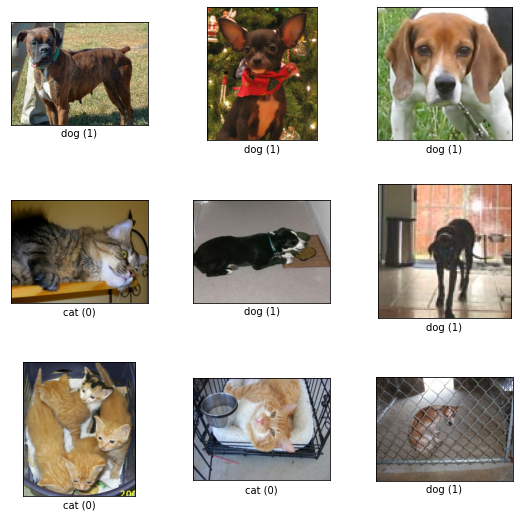

In [7]:
fig = tfds.show_examples(train_data, info)

<a name='4-3'></a>

## 4.3 Preparing Data: Building a Training Pipeline

Now, let's prepare the data, specifically, building an input pipeline.

First, the tensorflow datasets are returned as `uint8`, we need to resize and normalize the images while also converting it to `float32`.

In [8]:
def preprocess(image, label):

  """ 
  Take image and label, 
  Resize images to 180, 180
  convert images to float32, and return converted image &label
  """

  resized_image = tf.image.resize(image, [180, 180])
  normalized_img = tf.cast(resized_image, tf.float32)/255.0

  return normalized_img, label

Now, we can apply the above function to the dataset with `map`. Along the way, we will shuffle it, and batch the images. 

We do not shuffle the test set.

In [9]:
def train_data_prep(data, shuffle_size, batch_size):

  data = data.map(preprocess)
  data = data.cache()
  data = data.shuffle(shuffle_size)
  data = data.batch(batch_size)
  data = data.prefetch(1)

  return data

def val_data_prep(data, batch_size):

  data = data.map(preprocess)
  data = data.batch(batch_size)
  data = data.cache()
  data = data.prefetch(1)

  return data

In [11]:
train_data_prepared = train_data_prep(train_data, 1000, 32)
val_data_prepared = val_data_prep(val_data, 32)

<a name='4-4'></a>

## 4.4 Augmenting Images with Augmentation Layers

Learn more about Image Augmentation layers at [Keras doc](https://keras.io/api/layers/preprocessing_layers/image_augmentation/).

In [12]:
augmentation_layers = tf.keras.Sequential([
     tf.keras.layers.RandomFlip('horizontal_and_vertical'),
     tf.keras.layers.RandomRotation(0.2),
     tf.keras.layers.RandomContrast(0.4)
])

To illustrate augmentation, let's apply the above layers to the images. Because the images are already converted into batch, running the cell below will plot a given image in a batch (running it again displays a different image). And it will later be augmented. 

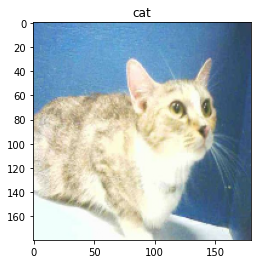

In [ ]:
image = train_data_prepared.take(1)
image, label = next(iter(image))

plt.imshow(image[0])
plt.title(class_names[label[0]]);

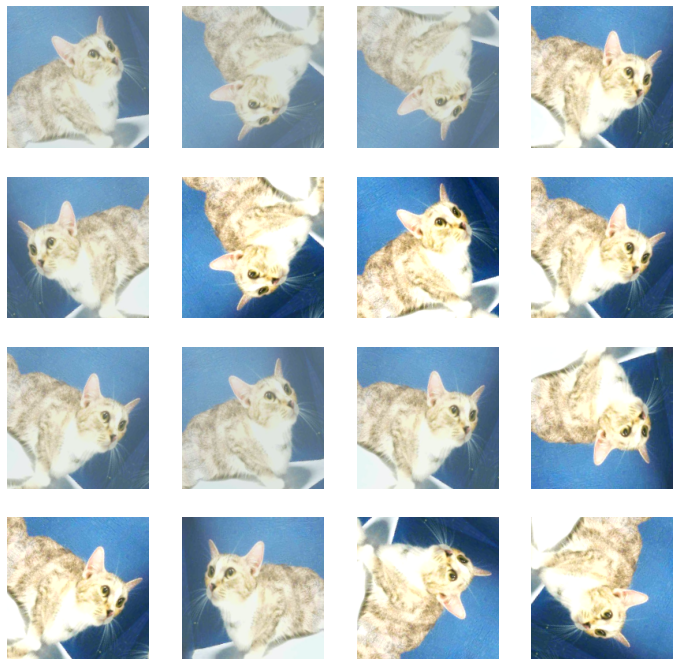

In [ ]:
plt.figure(figsize=(12,12))

for i in range(16):
  augmented_image = augmentation_layers(image)
  ax = plt.subplot(4,4,i+1);
  plt.imshow(augmented_image[0]);
  plt.axis('off');

As we can see from the above, it is pretty clear that the input image were transformed into many ways, from flipping, contrast change to being cropped. It's very amazing to just stack layers and use them to augment images on the fly. 

<a name='4-5'></a>

## 4.5 First Option: Using the Augmentation layers Outside the Model

Like we have seen, the augmentation layers can be used inside the model or outside the model. To use them outide the model is pretty straight. Just use a `lambda` function to get the image and label and apply the augmentation layers to every single image with a [map](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) function and return augmented image and label. 

Note that we do not augment the validation and test data. 


In [ ]:
train_data_augmented = train_data_prepared.map(lambda image, label: (augmentation_layers(image, training=True), label))

Now we can build the Convnet model. 

In [ ]:
model = tf.keras.Sequential([
                             
  # First Conv and maxpooling layer                         
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Second Conv and maxpooling layer 
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Third Conv and maxpooling layer 
  tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  
  # Fourth Conv and maxpooling layer 
  tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Flattening the feature maps into a 1D vector 
  tf.keras.layers.Flatten(),

  # Adding fully connected layers
  tf.keras.layers.Dense(256, activation='relu'),
  
  # Applying dropout to avoid overfitting
  tf.keras.layers.Dropout(0.3),

  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
  train_data_augmented,
  validation_data=val_data_prepared,
  epochs=10
)

Epoch 1/10
582/582 [==============================] - 1670s 3s/step - loss: 0.6910 - accuracy: 0.5494 - val_loss: 0.6827 - val_accuracy: 0.5363
Epoch 2/10
582/582 [==============================] - 1658s 3s/step - loss: 0.6480 - accuracy: 0.6238 - val_loss: 0.6178 - val_accuracy: 0.6492
Epoch 3/10
582/582 [==============================] - 1657s 3s/step - loss: 0.6048 - accuracy: 0.6724 - val_loss: 0.5553 - val_accuracy: 0.7104
Epoch 4/10
582/582 [==============================] - 1666s 3s/step - loss: 0.5841 - accuracy: 0.6908 - val_loss: 0.5539 - val_accuracy: 0.7279
Epoch 5/10
582/582 [==============================] - 1659s 3s/step - loss: 0.5639 - accuracy: 0.7081 - val_loss: 0.5472 - val_accuracy: 0.7317
Epoch 6/10
582/582 [==============================] - 1659s 3s/step - loss: 0.5424 - accuracy: 0.7246 - val_loss: 0.5120 - val_accuracy: 0.7569
Epoch 7/10
582/582 [==============================] - 1662s 3s/step - loss: 0.5366 - accuracy: 0.7311 - val_loss: 0.4940 - val_accuracy:

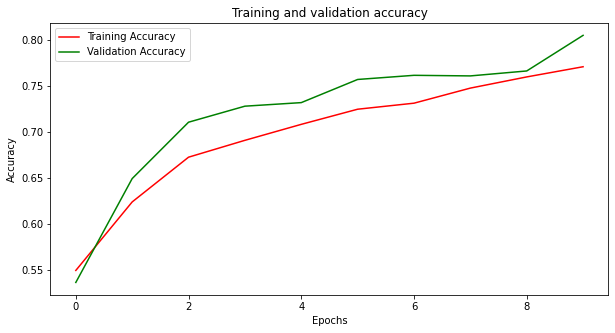

<Figure size 432x288 with 0 Axes>

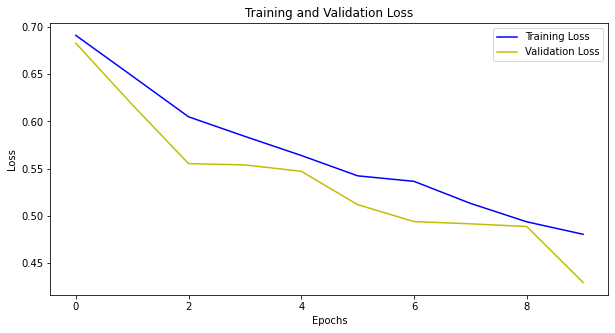

In [ ]:
model_history_5 = history.history

acc = model_history_5['accuracy']
val_acc = model_history_5['val_accuracy']
loss = model_history_5['loss']
val_loss = model_history_5['val_loss']

epochs = history.epoch

plot_acc_loss(acc, val_acc, loss, val_loss, epochs)

That was about training the model with the augmented images. Like we said, we can also have the the augmentation layers inside the model and take the advantage of GPU accelerations.

<a name='4-6'></a>

## 4.6 Second Option: Using the Augmentation layers Inside the Model

The augmentation layers that we created early will be the first layer in the model. At every training epoch, a given image is augmented(as described in the layers we defined above) before undergoing further transformations. 


In [13]:
model = tf.keras.Sequential([
                             
  # Augmentation layers

  augmentation_layers,
              
  # First Conv and maxpooling layer                         
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Second Conv and maxpooling layer 
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Third Conv and maxpooling layer 
  tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  
  # Fourth Conv and maxpooling layer 
  tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Flattening the feature maps into a 1D vector 
  tf.keras.layers.Flatten(),

  # Adding fully connected layers
  tf.keras.layers.Dense(256, activation='relu'),
  
  # Applying dropout to avoid overfitting
  tf.keras.layers.Dropout(0.3),

  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [14]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
history = model.fit(
  train_data_prepared,
  validation_data=val_data_prepared,
  epochs=10
)

Epoch 1/10
582/582 [==============================] - 1711s 3s/step - loss: 0.6802 - accuracy: 0.5593 - val_loss: 0.6397 - val_accuracy: 0.6182
Epoch 2/10
582/582 [==============================] - 1662s 3s/step - loss: 0.6338 - accuracy: 0.6377 - val_loss: 0.6296 - val_accuracy: 0.6505
Epoch 3/10
582/582 [==============================] - 1656s 3s/step - loss: 0.5885 - accuracy: 0.6877 - val_loss: 0.6099 - val_accuracy: 0.6808
Epoch 4/10
582/582 [==============================] - 1657s 3s/step - loss: 0.5749 - accuracy: 0.7015 - val_loss: 0.5250 - val_accuracy: 0.7367
Epoch 5/10
582/582 [==============================] - 1660s 3s/step - loss: 0.5593 - accuracy: 0.7127 - val_loss: 0.5245 - val_accuracy: 0.7416
Epoch 6/10
582/582 [==============================] - 1655s 3s/step - loss: 0.5433 - accuracy: 0.7236 - val_loss: 0.5365 - val_accuracy: 0.7281
Epoch 7/10
582/582 [==============================] - 1652s 3s/step - loss: 0.5353 - accuracy: 0.7303 - val_loss: 0.4975 - val_accuracy:

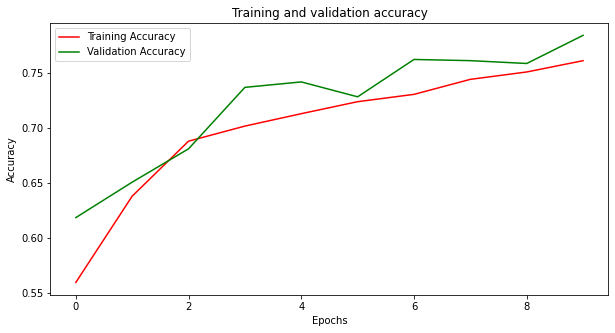

<Figure size 432x288 with 0 Axes>

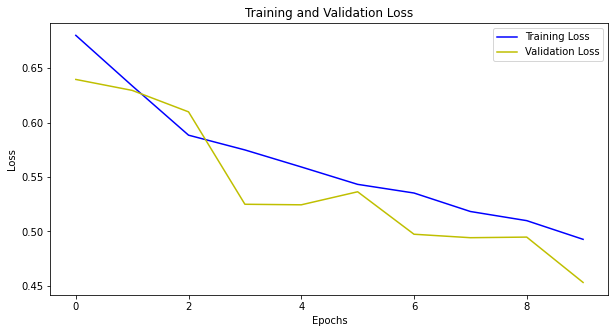

In [18]:
model_history_6 = history.history

acc = model_history_6['accuracy']
val_acc = model_history_6['val_accuracy']
loss = model_history_6['loss']
val_loss = model_history_6['val_loss']

epochs = history.epoch

plot_acc_loss(acc, val_acc, loss, val_loss, epochs)

That's it for using the Keras image augmentation layers. As it looks, the model with the augmentation layers inside seems bstter than the one with pre augmented images. And they were all trained with similar hyperparameters. 

<a name='5'></a>

## 5. Further Learning

The following are the most recommended courses to learn more about machine learning basics and computer vision

* [Google Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course) for foundations of Machine Learning

* [Intro to Deep Learning MIT (Lecture 1 and 3)](http://introtodeeplearning.com) for quick foundations of Deep Learning and Deep Computer Vision

* [Deep Learning Specialization, Andrew Ng](https://www.deeplearning.ai/program/deep-learning-specialization/). This is a great course to give you indepth foundations of Deep Learning. [Free on YouTube](https://www.youtube.com/playlist?list=PLkDaE6sCZn6Gl29AoE31iwdVwSG-KnDzF). 

* [Fast.AI Practical Deep Learning for Coders](https://course.fast.ai). This is the best in class course (very practical and has a high community ratings). 

## [BACK TO TOP](#0)